In [1]:
# https://www.kaggle.com/atulyakumar98/pothole-detection-dataset/code

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from  import image

In [6]:
train_path = "/home/vb/Documents/Aegis/Portfolio_Project/Pothole/Data/Train"
test_path = "/home/vb/Documents/Aegis/Portfolio_Project/Pothole/Data/Test"

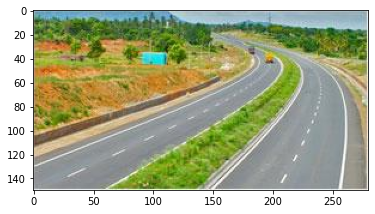

In [8]:
img = tf.keras.preprocessing.image.load_img("/home/vb/Documents/Aegis/Portfolio_Project/Pothole/Data/Train/normal/1.jpg")
plt.imshow(img)
plt.show()

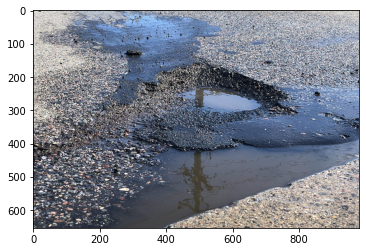

In [10]:
img = tf.keras.preprocessing.image.load_img("/home/vb/Documents/Aegis/Portfolio_Project/Pothole/Data/Train/potholes/1.jpg")
plt.imshow(img)
plt.show()

## Loadind Data

In [20]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                               horizontal_flip=True,
                                                               rotation_range=20)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [29]:
image_shape = 64
train_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (image_shape,image_shape),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 631 images belonging to 2 classes.


In [30]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (image_shape,image_shape),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 50 images belonging to 2 classes.


In [23]:
train_set.class_indices

{'normal': 0, 'potholes': 1}

In [24]:
test_set.class_indices

{'normal': 0, 'potholes': 1}

# Model

In [32]:
image_width, image_height, image_channels = 64, 64, 3

In [33]:
cnn = tf.keras.Sequential([
                           # Input layer
                           tf.keras.layers.InputLayer(input_shape = (image_width, image_height, image_channels)),
                           
                           tf.keras.layers.Conv2D(32, 3, activation= 'relu'),
                           tf.keras.layers.MaxPooling2D(2, 2),

                           tf.keras.layers.Conv2D(32, 3, activation= 'relu'),

                           # Flattening layer    
                           tf.keras.layers.Flatten(),

                           tf.keras.layers.Dense(128, activation='relu'),

                           # Output layer
                           tf.keras.layers.Dense(1, 'sigmoid')
                           ])

optimizer = tf.keras.optimizers.Adam()
cnn.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3444864   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 3,455,137
Trainable params: 3,455,137
Non-trainable params: 0
____________________________________________

In [34]:
cnn.fit(train_set, batch_size=32, epochs=25)

Epoch 1/25
20/20 [==============================] - 16s 760ms/step - loss: 0.8239 - accuracy: 0.5426
Epoch 2/25
20/20 [==============================] - 15s 779ms/step - loss: 0.5344 - accuracy: 0.6699
Epoch 3/25
20/20 [==============================] - 15s 743ms/step - loss: 0.4970 - accuracy: 0.7706
Epoch 4/25
20/20 [==============================] - 15s 752ms/step - loss: 0.3706 - accuracy: 0.8837
Epoch 5/25
20/20 [==============================] - 15s 768ms/step - loss: 0.2887 - accuracy: 0.8862
Epoch 6/25
20/20 [==============================] - 15s 750ms/step - loss: 0.2318 - accuracy: 0.9057
Epoch 7/25
20/20 [==============================] - 16s 787ms/step - loss: 0.2637 - accuracy: 0.8938
Epoch 8/25
20/20 [==============================] - 15s 777ms/step - loss: 0.2347 - accuracy: 0.9182
Epoch 9/25
20/20 [==============================] - 15s 764ms/step - loss: 0.2068 - accuracy: 0.9187
Epoch 10/25
20/20 [==============================] - 15s 762ms/step - loss: 0.2360 - accura

In [35]:
cnn.evaluate(test_set)

2/2 [==============================] - 2s 969ms/step - loss: 0.3959 - accuracy: 0.8800


[0.39588820934295654, 0.8799999952316284]

In [36]:
cnn.save("my_model_potholes")

2021-12-15 22:20:16.673626: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_model_potholes/assets


In [39]:
class_dict = {0:'normal', 1:"potholes"}

In [40]:
img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img("/home/vb/Documents/Aegis/Portfolio_Project/Pothole/Data/Train/potholes/1.jpg", target_size=(64,64)))
test_images = [img]
test_images = np.asarray(test_images)
test_images = test_images * (1/255)
val = cnn.predict(test_images)
result = class_dict[val[0].argmax(axis=0)]

In [41]:
val

array([[0.9999007]], dtype=float32)

In [42]:
result

'normal'

In [45]:
1 if val[0] > 0.5 else 0

1

In [46]:
val[0].argmax(axis=0)

0